In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [2]:
#Wholesale Customers Analysis
mydata=pd.read_csv('Wholesale+Customers+Data.csv')
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
#Use methods of descriptive statistics to summarize data
mydata.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [4]:
df=mydata.copy()

In [5]:
df.drop('Buyer/Spender',axis=1,inplace=True)

In [6]:
df.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [7]:
df.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [8]:
df['Total']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [10]:
df_channel=df.groupby('Channel').sum()['Total'].sort_values(ascending=False)

In [11]:
df_channel.head(1)

Channel
Hotel    7999569
Name: Total, dtype: int64

In [12]:
df_channel.tail(1)

Channel
Retail    6619931
Name: Total, dtype: int64

In [13]:
df_region=df.groupby('Region').sum()['Total'].sort_values(ascending=False)

In [14]:
df_region.head(1)

Region
Other    10677599
Name: Total, dtype: int64

In [15]:
df_region.tail(1)

Region
Oporto    1555088
Name: Total, dtype: int64

In [16]:
df_average_channel=df.groupby('Channel').mean()

In [17]:
df_average_channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,
Hotel,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
Retail,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


In [18]:
df_average_region=df.groupby('Region').mean()

In [19]:
df_average_region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,
Lisbon,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
Oporto,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
Other,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


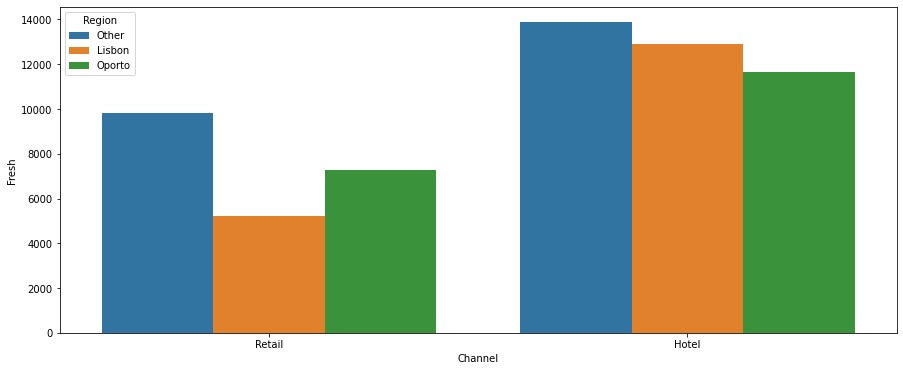

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(df['Channel'],df['Fresh'],ci=0,hue=df['Region']);

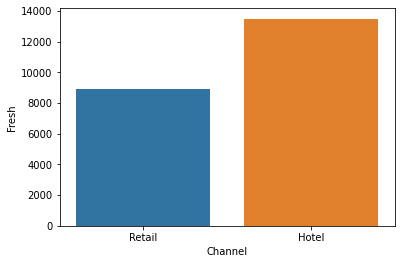

In [21]:
sns.barplot(df['Channel'],df['Fresh'],ci=0);

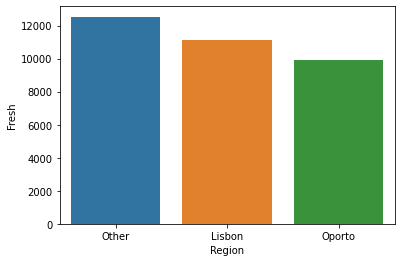

In [22]:
sns.barplot(df['Region'],df['Fresh'],ci=0);

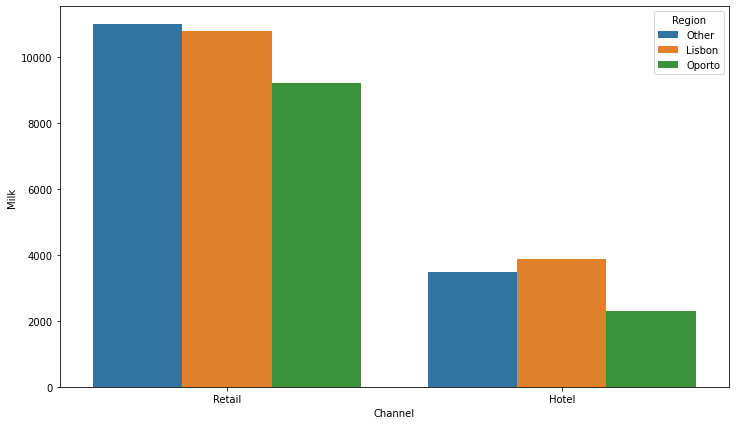

In [23]:
plt.figure(figsize=(12,7))
sns.barplot(df['Channel'],df['Milk'],ci=0,hue=df['Region']);

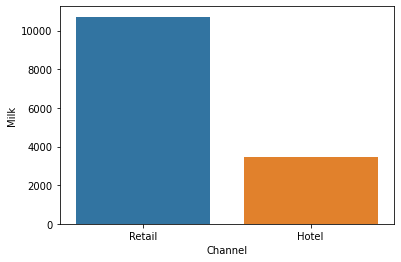

In [24]:
sns.barplot(df['Channel'],df['Milk'],ci=0);

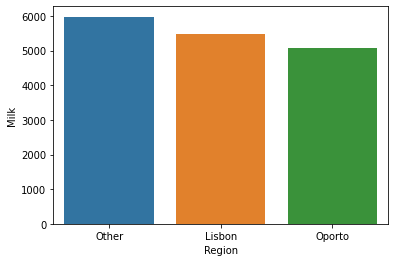

In [25]:
sns.barplot(df['Region'],df['Milk'],ci=0);

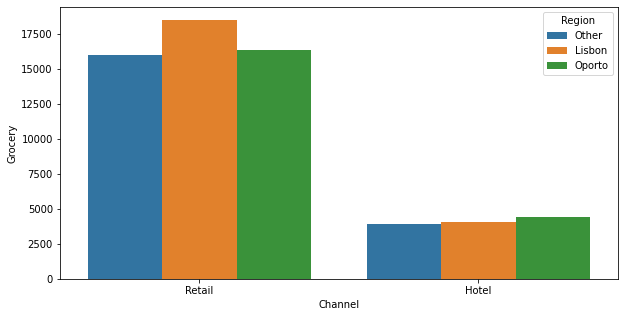

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(df['Channel'],df['Grocery'],ci=0,hue=df['Region']);

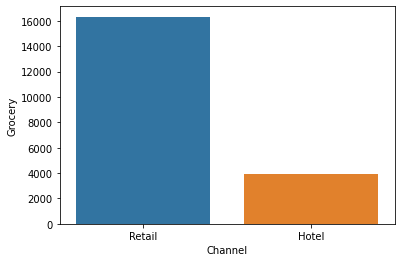

In [27]:
sns.barplot(df['Channel'],df['Grocery'],ci=0);

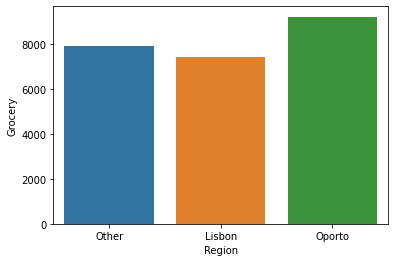

In [28]:
sns.barplot(df['Region'],df['Grocery'],ci=0);

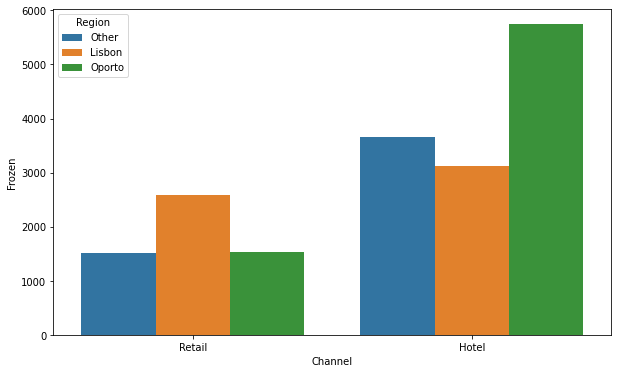

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(df['Channel'],df['Frozen'],ci=0,hue=df['Region']);

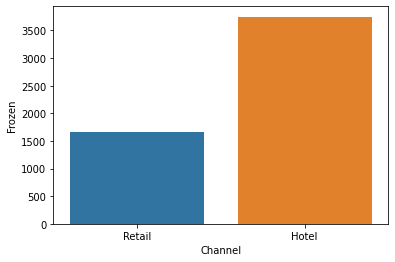

In [30]:
sns.barplot(df['Channel'],df['Frozen'],ci=0);

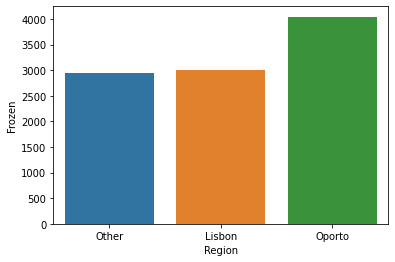

In [31]:
sns.barplot(df['Region'],df['Frozen'],ci=0);

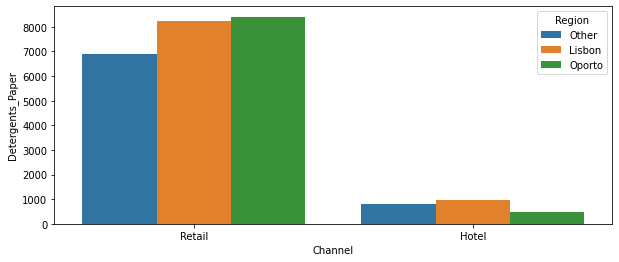

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(df['Channel'],df['Detergents_Paper'],ci=0,hue=df['Region']);

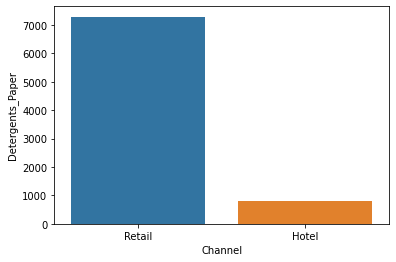

In [33]:
sns.barplot(df['Channel'],df['Detergents_Paper'],ci=0);

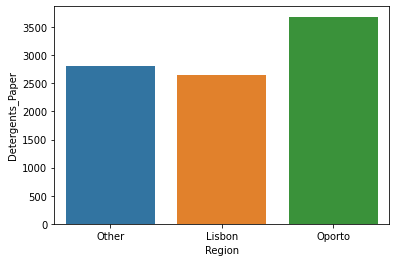

In [34]:
sns.barplot(df['Region'],df['Detergents_Paper'],ci=0);

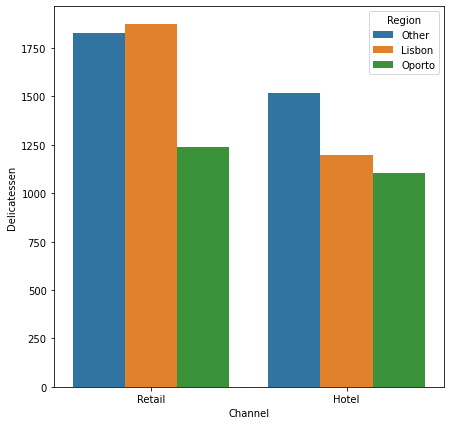

In [35]:
plt.figure(figsize=(7,7))
sns.barplot(df['Channel'],df['Delicatessen'],ci=0,hue=df['Region']);

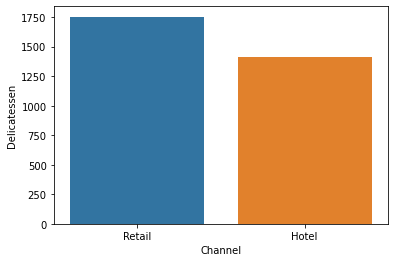

In [36]:
sns.barplot(df['Channel'],df['Delicatessen'],ci=0);

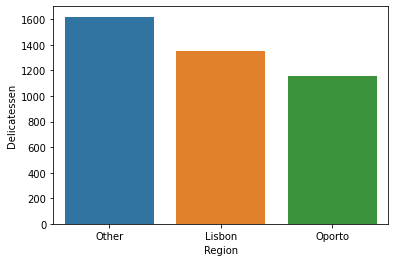

In [37]:
sns.barplot(df["Region"],df["Delicatessen"],ci=0);

In [38]:
df_item=df.drop(['Channel','Region','Total'],axis=1)
df_item.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [39]:
df_item.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [40]:
df_item.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [41]:
Fresh_CV=np.std(df_item["Fresh"])/np.mean(df_item['Fresh'])
Fresh_CV

1.0527196084948245

In [42]:
Milk_CV=np.std(df_item["Milk"])/np.mean(df_item['Milk'])
Milk_CV

1.2718508307424503

In [43]:
Grocery_CV=np.std(df_item["Grocery"])/np.mean(df_item['Grocery'])
Grocery_CV

1.193815447749267

In [44]:
Frozen_CV=np.std(df_item["Frozen"])/np.mean(df_item['Frozen'])
Frozen_CV

1.5785355298607762

In [45]:
Detergents_CV=np.std(df_item["Detergents_Paper"])/np.mean(df_item['Detergents_Paper'])
Detergents_CV

1.6527657881041729

In [46]:
Delicatessen_CV=np.std(df_item["Delicatessen"])/np.mean(df_item['Delicatessen'])
Delicatessen_CV

1.8473041039189306

In [47]:
df_item.var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

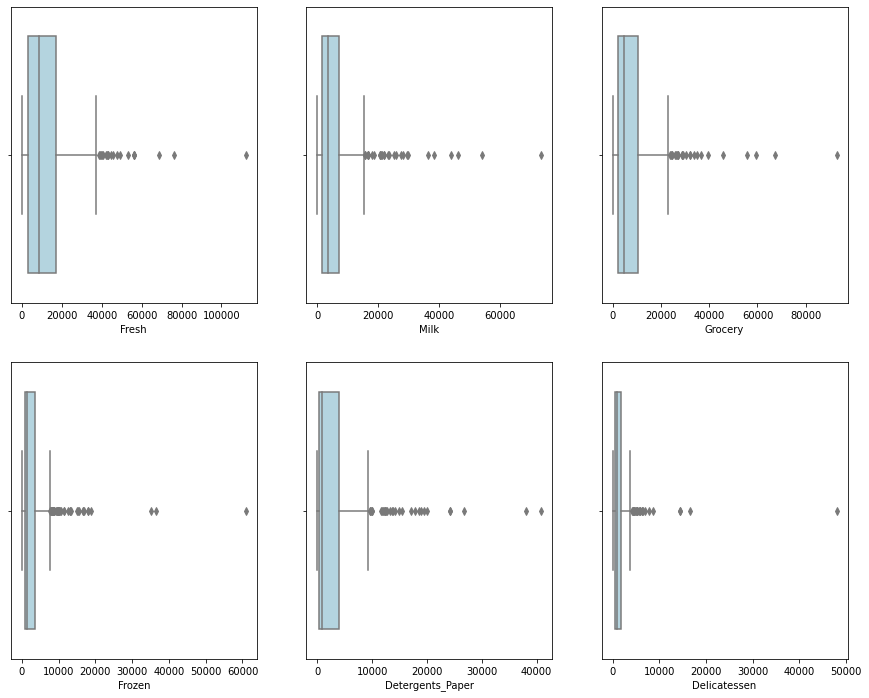

In [48]:
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.boxplot(x=df_item.Fresh,color='lightblue')

plt.subplot(2,3,2)
sns.boxplot(x=df_item.Milk,color='lightblue')

plt.subplot(2,3,3)
sns.boxplot(x=df_item.Grocery,color='lightblue')

plt.subplot(2,3,4)
sns.boxplot(x=df_item.Frozen,color='lightblue')

plt.subplot(2,3,5)
sns.boxplot(x=df_item.Detergents_Paper,color='lightblue')

plt.subplot(2,3,6)
sns.boxplot(x=df_item.Delicatessen,color='lightblue')

plt.show()

In [49]:
df_Survey=pd.read_csv('Survey-1.csv')

In [50]:
df_Survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [51]:
df_Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [52]:
df_Survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [53]:
tbl1=pd.crosstab(df_Survey['Gender'],df_Survey['Major'],margins=True)
tbl1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [54]:
tbl2=pd.crosstab(df_Survey['Gender'],df_Survey['Grad Intention'],margins=True)
tbl2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [55]:
tbl3=pd.crosstab(df_Survey['Gender'],df_Survey['Employment'],margins=True)
tbl3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [56]:
tbl4=pd.crosstab(df_Survey['Gender'],df_Survey['Computer'],margins=True)
tbl4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [57]:
df_Survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [58]:
print('Probability that a randomly selected CSMU student is male:',round((29/62),3))

Probability that a randomly selected CSMU student is male: 0.468


In [59]:
print('Probability that a randomly selected CSMU student is female:',round((33/62),3))

Probability that a randomly selected CSMU student is female: 0.532


In [60]:
print("Among Male Students:")
print("Probability of opting for Accounting->",round((4/29),3))
print("Probability of opting for CIS->",round((1/29),3))
print("Probability of opting for Economics/Finance->",round((4/29),3))
print("Probability of opting for International Business->",round((2/29),3))
print("Probability of opting for Management->",round((6/29),3))
print("Probability of opting for Other->",round((4/29),3))
print("Probability of opting for Retailing/Marketing->",round((5/29),3))
print("Probability undecided->",round((3/29),3))

Among Male Students:
Probability of opting for Accounting-> 0.138
Probability of opting for CIS-> 0.034
Probability of opting for Economics/Finance-> 0.138
Probability of opting for International Business-> 0.069
Probability of opting for Management-> 0.207
Probability of opting for Other-> 0.138
Probability of opting for Retailing/Marketing-> 0.172
Probability undecided-> 0.103


In [61]:
print("Among Female Students:")
print("Probability of opting for Accounting-",round((3/33),3))
print("Probability of opting for CIS-",round((3/33),3))
print("Probability of opting for Economics/Finance-",round((7/33),3))
print("Probability of opting for International Business-",round((4/33),3))
print("Probability of opting for Management-",round((4/33),3))
print("Probability of opting for Other-",round((3/33),3))
print("Probability of opting for Retailing/Marketing-",round((9/33),3))
print("Probability undecided-",0/33)

Among Female Students:
Probability of opting for Accounting- 0.091
Probability of opting for CIS- 0.091
Probability of opting for Economics/Finance- 0.212
Probability of opting for International Business- 0.121
Probability of opting for Management- 0.121
Probability of opting for Other- 0.091
Probability of opting for Retailing/Marketing- 0.273
Probability undecided- 0.0


In [62]:
print("The probability that a randomly chosen student is a male and intends to graduate",round((17/29),3))

The probability that a randomly chosen student is a male and intends to graduate 0.586


In [63]:
print("The probability that a randomly selected student is a female and does NOT have a laptop",round((4/62),3))

The probability that a randomly selected student is a female and does NOT have a laptop 0.065


In [64]:
probab_male=29
probab_full_time=10
probab_male_full_time=7
total_student=62
print("The probability that randomly chosen student is a male or has full-time employment:-",round(((probab_male+probab_full_time-probab_male_full_time)/62),3))

The probability that randomly chosen student is a male or has full-time employment:- 0.516


In [69]:
prob_female_international_business=4/33
prob_female_management=4/33
print("Probability that given a female student is randomly chosen, she is majoring in international business or management is",round((prob_female_international_business+prob_female_management),3))

Probability that given a female student is randomly chosen, she is majoring in international business or management is 0.242


In [70]:
df_new=df_Survey.copy()

In [71]:
df_new.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [73]:
df_new.drop(df_new.index[df_new['Grad Intention']=="Undecided"],inplace=True)

In [74]:
df_new.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [75]:
table1=pd.crosstab(df_new['Gender'],df_new['Grad Intention'])
table1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [77]:
table2=pd.crosstab(df_Survey['GPA']<3,df_Survey['Gender'],margins=True)
table2

Gender,Female,Male,All
GPA,,,
False,25,20,45
True,8,9,17
All,33,29,62


In [81]:
print("The probability that a randomly chosen student has GPA less than 3 is",round((17/62),3))

The probability that a randomly chosen student has GPA less than 3 is 0.274


In [82]:
table3=pd.crosstab(df_Survey['Salary']>=50,df_Survey['Gender'],margins=True)
table3

Gender,Female,Male,All
Salary,,,
False,15,15,30
True,18,14,32
All,33,29,62


In [84]:
print("The conditional probability that a randomly selected male earns 50 or more is",round((14/32),3))

The conditional probability that a randomly selected male earns 50 or more is 0.438


In [85]:
print("The conditional probability that a randomly selected female earns 50 or more is",round((18/32),3))

The conditional probability that a randomly selected female earns 50 or more is 0.562


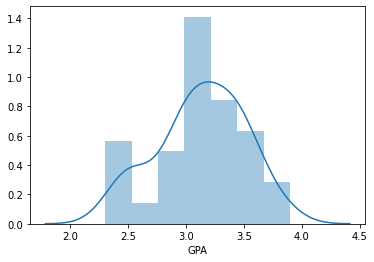

In [89]:
sns.distplot(df_Survey['GPA']);

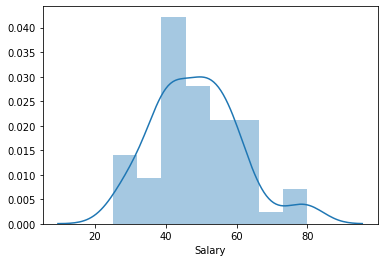

In [90]:
sns.distplot(df_Survey.Salary);

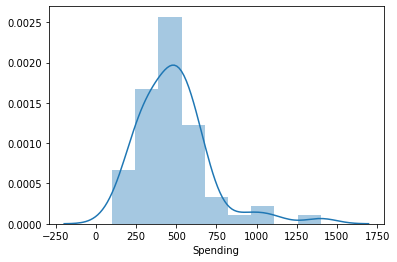

In [93]:
sns.distplot(df_Survey['Spending']);

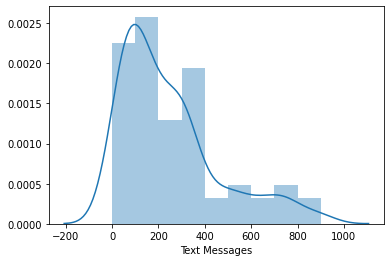

In [94]:
sns.distplot(df_Survey['Text Messages']);

In [95]:
shingles=pd.read_csv('A+&+B+shingles.csv')

In [96]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [102]:
t_statistic,p_value1=ttest_1samp(shingles['A'],0.35)
print("One sample t test-\n t_statistics:{0} and p_value1:{1}".format(t_statistic,p_value1/2))

One sample t test-
 t_statistics:-1.4735046253382782 and p_value1:0.07477633144907513


In [103]:
alpha=0.05
if(p_value1<alpha):
    print("We reject the null hypothesis")
else:
    print("we fail to reject the hypothesis")

we fail to reject the hypothesis


In [105]:
t_statistic,p_value2=ttest_1samp(shingles['B'],0.35,nan_policy="omit")
print("One sample t test->\n t_statistics:{0} and p_value2:{1}".format(t_statistic,p_value2/2))

One sample t test->
 t_statistics:-3.1003313069986995 and p_value2:0.0020904774003191826


In [106]:
alpha=0.05 
if(p_value2<alpha):
    print("We reject the null hypothesis")
else:
    print("we fail to reject the hypothesis")

We reject the null hypotesis


In [107]:
t_statistic,p_value=ttest_ind(shingles["A"],shingles["B"],equal_var=True,nan_policy="omit")
print("t_statistic = {} and p_value = {}".format(round(t_statistic,3),round(p_value,3)))

t_statistic = 1.29 and p_value = 0.202


In [109]:
alpha=0.05 
if(p_value<alpha):
    print("We reject the null hypothesis")
else:
    print("we fail to reject the hypothesis")

we fail to reject the hypothesis
